# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
from urllib2 import Request, urlopen
import pandas as pd
import requests_cache
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import requests

In [2]:

def ndb_search(key,search_terms):
    '''
argument : This function is to take all of the parameter to form a query, and return an empty list if 

Input:
    key (data.gov API key, string), NDB(nbd number, stirng)
      
Output:
     food information(list)

'''
    url = 'https://api.nal.usda.gov/ndb/search'
    response = requests.get(url, params = {
            'api_key':key,
            'q':search_terms,
            'format':'json',
            '_sort':'r'
             })
    js = response.json()
    if 'list' not in js.keys():
        return []
    else:
        return js['list']['item']


In [3]:
data = ndb_search('RMn9BFQ6vPdIoSePncQ8rsoXkq1vlQDIrQjelHOE','quail egg')
data

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

<h3>
Strategy:
</h3>
<em>
<ul>
<li>First, I transform kiwi's name, since after I search the NDB number, I found that the NDB number of kiwi is none. So I change the name to kiwifruit. Also, I replace all of the "_" to " " to avoid the risk of "none" NDB number.</li>
<li>Second, I judge whether the "ds" is "SR" and whether there is "juice" in the name .</li>
<li>Third, I extract the NDB number. 
<li>Finally, I append it to "result_2", and concat it and the food name to a dataframe.</li>
</ul>
</em>

In [5]:
## Read all the excel files
path = 'Desktop/fresh.csv'
import pandas as pd
import numpy as np
import os
import glob
import matplotlib
import re
from ipykernel import kernelapp as app
files = glob.glob(path)
d = []
for f in files:
    d.append(pd.read_csv(f)) 

In [6]:
d = pd.concat(d)
food = d['food']

In [7]:
food = food.replace(to_replace = 'kiwi', value = 'kiwifruit')

In [8]:
## Search for the NDB number 
result_2 = []
for i in food:
    i = i.replace('_', ' ')
    result = ndb_search('RMn9BFQ6vPdIoSePncQ8rsoXkq1vlQDIrQjelHOE',i+', raw')
    if result == []:
        result_2.append('None')
    else:
        for j in result:
            if(j['ds'] =='SR') and 'juice' not in j['name']:
                result_2.append(j['ndbno'])
                break

In [9]:
## Convert result_3 to dataframe and concat it with food name to build a new dataframe.
result_3 = pd.DataFrame(result_2)
food = pd.DataFrame(food)
NDB = pd.concat([food, result_3], axis = 1)
NDB.columns = ['food', 'ndbno']
NDB

,food,ndbno
0,watermelon,09326
1,cantaloupe,09181
2,tangerines,09218
3,strawberries,09316
4,plums,09279
5,oranges,09201
6,raspberries,09302
7,pomegranate,09286
8,pineapple,09266
9,apricots,09021


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [10]:
def ndb_report(key,NDB):
    '''
argument : This function is to take all of the parameter to form a query

Input:
    key (data.gov API key, string), NDB(nbd number, stirng)
      
Output:
    nutrients list
'''
    url = 'https://api.nal.usda.gov/ndb/V2/reports'
    response = requests.get(url, params = {
            'api_key':key,
            'ndbno':NDB,
            'type':'b',
            'format':'json',
             })
    nutrients = response.json()
    nutrients = nutrients['foods'][0]['food']['nutrients']
    return nutrients
    


    

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

<h3>Note:       

We define value to be nutrient times yield divided by the united price.
Hence, the higher the value of the foods, the more people worth to buy them.
Also, we define the total nutrient to be nutrient times yield. We use energy to represent the nutrient of food.
</h3>

In [11]:
Energy = []
for i in range(0, 49):
    ndb = ndb_report('RMn9BFQ6vPdIoSePncQ8rsoXkq1vlQDIrQjelHOE', result_2[i])
    Energy.append(ndb[1]['value'])
Energy = pd.DataFrame(Energy)

In [12]:
food_inf = pd.concat([d['food'],Energy, d['yield'], d['price_per_lb'], d['type']], axis = 1 )
food_inf.columns = ['food', 'nutrient', 'yield', 'price_per_lb', 'type'] 
food_inf.nutrient = food_inf.nutrient.astype(float)
food_inf['value'] = (food_inf['nutrient'] *food_inf['yield'])/(food_inf['price_per_lb'] * 4.53)## Convert price _per lb to price_per_kg, and calculate the value for the total nutrient for the unit price, which denote "value"

In [13]:
food_inf['tol_nut'] = food_inf['nutrient'] * food_inf['yield']

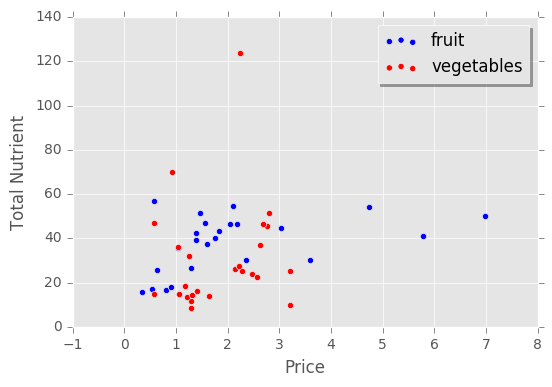

In [14]:
ax = food_inf[food_inf.type == "fruit"].plot.scatter('price_per_lb', 'tol_nut', color = "Blue")
food_inf[food_inf.type == "vegetables"].plot.scatter("price_per_lb", "tol_nut", color = "red", ax = ax)
ax.set(xlabel = "Price", ylabel = "Total Nutrient")
ax.legend(loc='upper right', shadow=True, labels= ['fruit','vegetables' ])

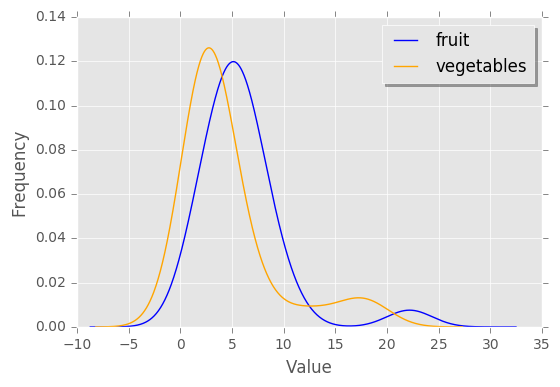

In [14]:
ax = food_inf[food_inf.type == "fruit"].plot('price_per_lb', 'value', color = "Blue", kind = 'density')
food_inf[food_inf.type == "vegetables"].plot("price_per_lb", "value", color = "orange", ax = ax, kind = 'density')
ax.set(xlabel = "Value", ylabel = "Frequency")
ax.legend(loc='upper right', shadow=True, labels= ['fruit','vegetables' ])

<strong>
<ul>In general:   
<li>From the scatter plot, the overall total nutrient of fruit is higher than the total nutrient of vegetables given the same price since the blue points cluster are above the red points cluster.</li>
<li>From the density plot, mean nutrition per cost for fruit is greater than that of vegetable, and the spread of nutrition per cost of  vegetables is less than that of fruits.
<li>Since there is a small positive relation between total nutrient and the unit price.Therefore, with the price increases, the total nutrient increases, though there exist several outliers.</li>
</ul>
</strong>

In [19]:
fruit_inf = food_inf[0:24]
vegetable_inf = food_inf[24:49]

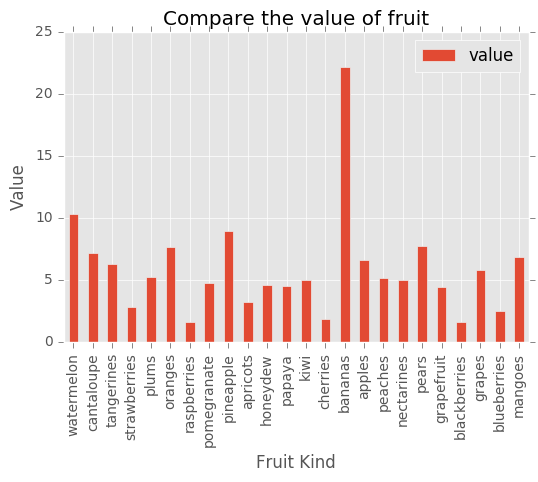

In [25]:
fruit_inf.plot(x = 'food', y = 'value', fontsize = 10, kind = 'bar', title = 'Compare the value of fruit')
plt.xlabel('Fruit Kind')
plt.ylabel('Value')
plt.show()

<strong>
banana has the most value among different fruits.
</strong>

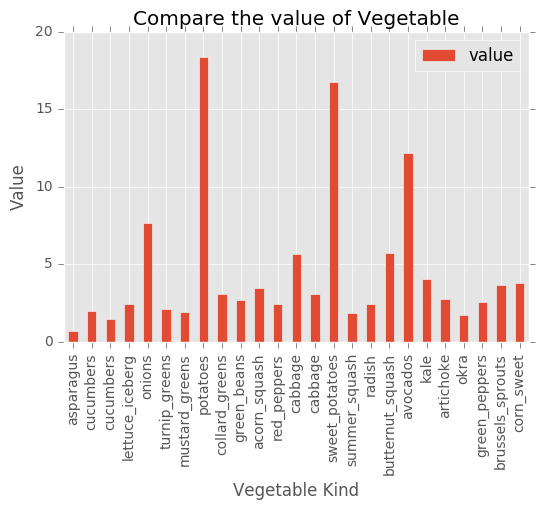

In [26]:
vegetable_inf.plot(x = 'food', y = 'value', fontsize = 10, kind = 'bar', title = 'Compare the value of Vegetable')
plt.xlabel('Vegetable Kind')
plt.ylabel('Value')
plt.show()

<strong>
Potatoes and sweat patatoes have the most value among different vegetables.
</strong>

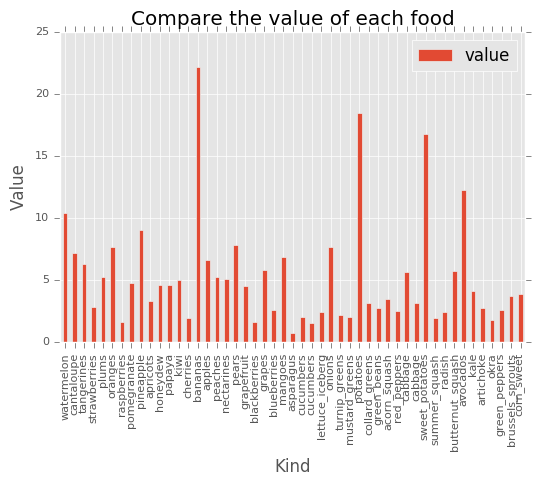

In [27]:
food_inf.plot(x = 'food', y = 'value', fontsize = 8, kind = 'bar', title = 'Compare the value of each food')
plt.xlabel('Kind')
plt.ylabel('Value')
plt.show()

<strong>
<ul>
Conclusion: 
<li> In general, the overall total nutrient of fruit is higher than the total nutrient of vegetables given same price.</li>
<li> In general, high price food have relatively high nutrient.</li>
<li> Banana is the most competitive food which accordding to the combination of the price, nutruit and yield.</li>
</ul>
</strong>